In [53]:
import math

diametro_cm = 8.2
area_da_boca_do_coletor_cm2 = (math.pi*(diametro_cm**2))/4
IRN_mm = 11
area_do_coletor_m2 = 9
area_do_aspersor = 144
eC = 95
evaporado_cm3 = 4

print(area_da_boca_do_coletor_cm2)

52.81017250684442


In [54]:
import pandas as pd

# Ler a planilha do Excel
df = pd.read_excel("C:/Users/jp58/Desktop/IRRIGAÇÃO E DRENAGEM/Semana 10/Nova pasta/DadosAspersaoConvencional.xlsx",index_col=None, header=None)

# Equação de acrésimo da evaporação
def acrescentar_evaoracao(valor):
    if valor > 0:
        return (valor + evaporado_cm3) /area_da_boca_do_coletor_cm2*10
    else:
        return valor

# Aplica a equação em todos os valores do DataFrame
df = df.applymap(acrescentar_evaoracao)

print(df)

   0         1         2          3          4         5         6         7
0  0  0.000000  0.000000   0.946787   1.325502  0.000000  0.000000  0.000000
1  0  0.000000  2.082932   2.840362   3.219077  2.272289  1.893575  0.000000
2  0  2.272289  4.355222   6.438154   7.006226  5.112651  2.840362  1.514860
3  0  3.029719  7.953013   9.089158  10.604018  7.006226  4.923294  2.651004
4  0  3.597792  9.089158  12.308235   9.657230  7.195583  4.923294  2.651004
5  0  2.840362  6.627511   7.763656   6.627511  5.112651  3.029719  2.272289
6  0  1.325502  3.029719   4.733936   4.165864  2.840362  2.651004  0.000000
7  0  0.000000  0.946787   2.272289   2.272289  1.704217  0.000000  0.000000


In [55]:
# Precido divir em quadrantes
total_rows, total_cols = df.shape

# Calcular o tamanho dos quadrantes
subtable_cols = total_cols // 2
subtable_rows = total_rows // 2

# Criar o novo dataframe
novo_df = pd.DataFrame(index=range(subtable_rows), columns=range(subtable_cols))

# Preencher o novo dataframe com os valores somados
for i in range(subtable_rows):
    for j in range(subtable_cols):
        soma = df.iloc[i + subtable_rows, j] + df.iloc[i, j + subtable_cols] + df.iloc[i, j] + df.iloc[i + subtable_rows, j + subtable_cols]
        novo_df.iloc[i, j] = soma

# Imprimir o novo dataframe
print(novo_df)

           0          1          2          3
0  10.982733  10.793375  14.012452  15.906026
1   9.846588  10.225303  13.633737  12.876307
2   11.17209  11.550805  12.876307   12.68695
3  12.876307  11.740162  13.823094  14.012452


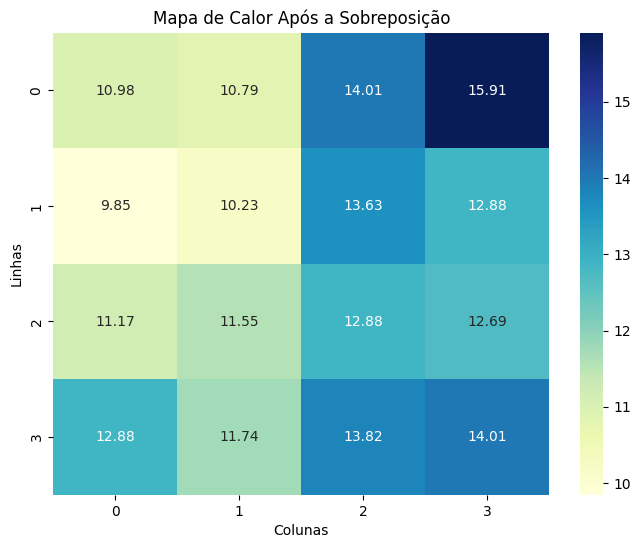

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Converta os valores para numéricos
df = novo_df.apply(pd.to_numeric)

# Crie um mapa de calor usando o seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(df, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Mapa de Calor Após a Sobreposição')
plt.xlabel('Colunas')
plt.ylabel('Linhas')

plt.show()


In [57]:
import numpy as np

# Transforma o DataFrame em uma lista
lista = novo_df.values.ravel().tolist()

#Aqui eu calculo média e soma da lista
media = np.mean(lista)
soma =np.sum(lista)

# Exibe a lista resultante
print(lista)

print(media, soma)

[10.982732539357443, 10.793375081782315, 14.012451860559494, 15.90602643631078, 9.846587793906673, 10.22530270905693, 13.63373694540924, 12.876307115108727, 11.17208999693257, 11.550804912082828, 12.876307115108727, 12.6869496575336, 12.876307115108727, 11.740162369657957, 13.823094402984367, 14.012451860559494]
12.438417994466242 199.01468791145987


In [58]:
# Ordena os valores em ordem decrescente
lista_ordenada = sorted(lista, reverse=True)

# Cria o DataFrame com as colunas
df = pd.DataFrame(columns=['Coletor', 'Lâmina (xi) (mm)', '|xi-x| (mm)', '|xi-x|² (mm)', 'xi - IRN (mm)', 'Lâmina relativa (xi/IRN)', 'Excedente (L)', 'Volume armazenado (L)', 'AAI (%)', 'AAI (%) acumulada'])

def xi_IRN(valor1):
    if valor1 >= IRN_mm:
        return valor1 - IRN_mm
    else:
        return "" 

def volume_excedente(valor2):
    if valor2 >= IRN_mm:
        return IRN_mm * area_do_coletor_m2
    else:
        return valor2 * area_do_coletor_m2

# Preenche as colunas com base na lista
df['Coletor'] = range(1, len(lista_ordenada) + 1)
df['Lâmina (xi) (mm)'] = lista_ordenada
df['|xi-x| (mm)'] = df['Lâmina (xi) (mm)'].apply(lambda x: abs(x - media))
df['|xi-x|² (mm)'] = df['|xi-x| (mm)'] **2
df['xi - IRN (mm)'] = df['Lâmina (xi) (mm)'].apply(xi_IRN)
df['Lâmina relativa (xi/IRN)'] = df['Lâmina (xi) (mm)'] / IRN_mm
df['Excedente (L)'] = df['xi - IRN (mm)']*area_do_coletor_m2
df['Volume armazenado (L)'] = df['Lâmina (xi) (mm)'].apply(volume_excedente)
df['AAI (%)'] = area_do_coletor_m2/area_do_aspersor*100
df['AAI (%) acumulada'] = df['AAI (%)'].cumsum()

print(df)

    Coletor  Lâmina (xi) (mm)  |xi-x| (mm)  |xi-x|² (mm) xi - IRN (mm)   
0         1         15.906026     3.467608     12.024308      4.906026  \
1         2         14.012452     1.574034      2.477583      3.012452   
2         3         14.012452     1.574034      2.477583      3.012452   
3         4         13.823094     1.384676      1.917329      2.823094   
4         5         13.633737     1.195319      1.428787      2.633737   
5         6         12.876307     0.437889      0.191747      1.876307   
6         7         12.876307     0.437889      0.191747      1.876307   
7         8         12.876307     0.437889      0.191747      1.876307   
8         9         12.686950     0.248532      0.061768       1.68695   
9        10         11.740162     0.698256      0.487561      0.740162   
10       11         11.550805     0.887613      0.787857      0.550805   
11       12         11.172090     1.266328      1.603587       0.17209   
12       13         10.982733     1.45

In [59]:
soma_xi_x_mm = df['|xi-x| (mm)'].sum()
soma_xi_x2_mm = df['|xi-x|² (mm)'].sum()

valores_numericos_excedente = pd.to_numeric(df['Excedente (L)'], errors='coerce')
soma_excedente_L = valores_numericos_excedente.sum()

valores_numericos_volume_armazenado = pd.to_numeric(df['Volume armazenado (L)'], errors='coerce')
soma_armazenado_L = valores_numericos_volume_armazenado.sum()

print(f"{soma_xi_x_mm}\n{soma_xi_x2_mm}\n{soma_excedente_L}\n{soma_armazenado_L}")

21.515741116973956
40.2822521962009
226.50020808620863
1564.6319831169303


In [60]:
cUC = (1-(soma_xi_x_mm/(len(lista_ordenada)*media)))*100

print(cUC)

89.18886774500476


In [61]:
# Calcula o quartil desejado
quartil = df['Lâmina (xi) (mm)'].quantile(0.25)

# Filtra os valores menores ou iguais ao quartil
valores_quartil = df[df['Lâmina (xi) (mm)'] <= quartil]['Lâmina (xi) (mm)']

# Calcula a média dos valores filtrados
media_quartil = valores_quartil.mean()

# Exibe a média dos 25% menores valores
print(media_quartil)

cUD = media_quartil/media*100

print(cUD)

10.46199953102584
84.11037107516651


In [62]:
import math

cV = math.sqrt(soma_xi_x2_mm/(len(lista_ordenada)-1))/media*100
print(cV)

cUE = 100-cV
print(cUE)

13.17486261902462
86.82513738097538


In [63]:
eA = soma_armazenado_L/(soma_armazenado_L+soma_excedente_L)*100
print(eA)

87.35435557472371


In [64]:
# Verificar se há valores não numéricos ou vazios na coluna 'xi - IRN (mm)'
nao_numericos_ou_vazios = ~df['xi - IRN (mm)'].apply(pd.to_numeric, errors='coerce').notna()

if nao_numericos_ou_vazios.any():
    # Encontrar o primeiro índice não numérico ou vazio na coluna 'xi - IRN (mm)'
    primeiro_indice_nao_numerico_vazio = nao_numericos_ou_vazios.idxmax()

    # Obter o valor correspondente na coluna 'Lâmina (xi) (mm)'
    valor_correspondente = df['Lâmina (xi) (mm)'].iloc[primeiro_indice_nao_numerico_vazio - 1]

    # Exibir o valor correspondente que vai ser quando para de irrigar a quantidade necessária
    print(valor_correspondente)

    eD = valor_correspondente/media*100
    print(eD)
else:
    print("Não há valores não numéricos ou vazios na coluna 'xi - IRN (mm)'.")

11.17208999693257
89.81921979067553


In [65]:
eI = eD/100 * eA/100 * eC/100

print(eI*100)

74.53795059886984


In [66]:
# Verificar se há valores não numéricos ou vazios na coluna 'xi - IRN (mm)'
nao_numericos_ou_vazios = ~df['xi - IRN (mm)'].apply(pd.to_numeric, errors='coerce').notna()

if nao_numericos_ou_vazios.any():
    # Encontrar o primeiro índice não numérico ou vazio na coluna 'xi - IRN (mm)'
    primeiro_indice_nao_numerico_vazio = nao_numericos_ou_vazios.idxmax()

    # Obter o valor correspondente na coluna 'Lâmina (xi) (mm)'
    valor_correspondente2 = df['AAI (%) acumulada'].iloc[primeiro_indice_nao_numerico_vazio - 1]


    AAI = valor_correspondente2
    print(AAI)
else:
    print("Não há valores não numéricos ou vazios na coluna 'xi - IRN (mm)'.")

75.0


In [67]:
nome_arquivo = 'teste.xlsx'

df.to_excel(nome_arquivo, index=False)

In [68]:
import openpyxl 

workbook = openpyxl.load_workbook('C:\\Users\\jp58\Desktop\\IRRIGAÇÃO E DRENAGEM\\Semana 10\\Nova pasta\\teste.xlsx')
planilha = workbook.active

planilha['L1'] = "CUC(%)"
planilha['L2'] = "CUD(%)"
planilha['L3'] = "CUE(%)"
planilha['L4'] = "Ea(%)"
planilha['L5'] = "Ed(%)"
planilha['L6'] = "Ei(%)"
planilha['L7'] = "AAI(%)"
planilha['M1'] = cUC
planilha['M2'] = cUD
planilha['M3'] = cUE
planilha['M4'] = eA
planilha['M5'] = eD
planilha['M6'] = eI*100
planilha['M7'] = AAI

nome_arquivo = 'planilha.xlsx'
workbook.save(nome_arquivo)